In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import (LinearRegression
)
from sklearn.preprocessing import OneHotEncoder
from utils import (
    describe_dataframe, df_train_test, graph_results, reg_train_eval
)

In [2]:
main = pd.read_csv("../data/combo_data.csv")
main

,BENE_ID,CLM_ID,CLM_FROM_DT,CLM_THRU_DT,YR,LOS,DRG,PRNCPAL_DGNS_CD,PTNT_DSCHRG_STUS_CD,CLM_IP_ADMSN_TYPE_CD,...,NUM_DIAG,ICD_Description,DRG_TITLE,STATE_CODE,COUNTY_CD,SEX_IDENT_CD,BENE_RACE_CD,ESRD_IND,Age,TOT_RX_CST_AMT
0,-10000010254618,-10000930037831,2015-03-25,2015-03-25,2015,0,551,S134XX,1,1,...,9,Sprain of ligaments of cervical spine,MEDICAL BACK PROBLEMS WITH MCC,1,1500,1,1,0,16,275.19
1,-10000010254653,-10000930038030,2015-09-24,2015-09-24,2015,0,951,Z3480,1,1,...,4,Encounter for supervision of other normal pre...,OTHER FACTORS INFLUENCING HEALTH STATUS,1,1400,2,1,0,33,0.00
2,-10000010254653,-10000930038031,2017-05-09,2017-05-10,2017,1,923,T7432X,1,3,...,3,"Child psychological abuse, confirmed","OTHER INJURY, POISONING AND TOXIC EFFECT DIAGN...",1,1400,2,1,0,35,0.00
3,-10000010254656,-10000930038162,2017-01-14,2017-01-14,2017,0,564,S8290X,1,1,...,4,Unspecified fracture of unspecified lower leg,OTHER MUSCULOSKELETAL SYSTEM AND CONNECTIVE TI...,1,1360,2,1,0,18,302.04
4,-10000010254656,-10000930038163,2018-03-17,2018-03-17,2018,0,951,Z3480,1,1,...,6,Encounter for supervision of other normal pre...,OTHER FACTORS INFLUENCING HEALTH STATUS,1,1360,2,1,0,19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,-10000010288008,-10000931485965,2020-01-08,2020-01-14,2020,6,0,T50901A,1,3,...,12,"Poisoning by unspecified drugs, medicaments an...",NaN,5,5430,1,5,0,75,0.00
20863,-10000010288008,-10000931485967,2020-10-23,2020-10-23,2020,0,0,T50901A,1,1,...,12,"Poisoning by unspecified drugs, medicaments an...",NaN,5,5430,1,5,0,75,0.00
20864,-10000010288008,-10000931485969,2021-08-22,2021-08-23,2021,1,0,T50901A,1,1,...,13,"Poisoning by unspecified drugs, medicaments an...",NaN,5,5430,1,5,0,76,0.00
20865,-10000010288008,-10000931485971,2021-09-13,2021-09-16,2021,3,0,T50901A,1,2,...,13,"Poisoning by unspecified drugs, medicaments an...",NaN,5,5430,1,5,0,76,0.00


In [3]:
describe_dataframe(main)

,column_name,dtype,non_null_count,null_count,unique_count,sample_values,min,max,mean
0,BENE_ID,int64,20867,0,5699,"[-10000010254618, -10000010254653, -1000001025...",-10000010288010,-10000010254618,-10000010270649.408203
1,CLM_ID,int64,20867,0,20867,"[-10000930037831, -10000930038030, -1000093003...",-10000931486024,-10000930037831,-10000930747721.667969
2,CLM_FROM_DT,object,20867,0,2914,"[2015-03-25, 2015-09-24, 2017-05-09, 2017-01-1...",None,None,None
3,CLM_THRU_DT,object,20867,0,2910,"[2015-03-25, 2015-09-24, 2017-05-10, 2017-01-1...",None,None,None
4,YR,int64,20867,0,9,"[2015, 2017, 2018, 2022, 2021]",2015,2023,2019.100014
5,LOS,int64,20867,0,45,"[0, 1, 10, 11, 2]",0,104,1.054919
6,DRG,int64,20867,0,168,"[551, 951, 923, 564, 101]",0,976,662.292088
7,PRNCPAL_DGNS_CD,object,20867,0,190,"[S134XX, Z3480, T7432X, S8290X, Z3400]",None,None,None
8,PTNT_DSCHRG_STUS_CD,int64,20867,0,1,[1],1,1,1.0
9,CLM_IP_ADMSN_TYPE_CD,int64,20867,0,3,"[1, 3, 2]",1,3,1.399195


In [ ]:
#Have to aggregate certain columns by beneficiary, over the years
select_cols = ["LOS" ,
               "YR",  
               "PRNCPAL_DGNS_CD", 
               "CLM_IP_ADMSN_TYPE_CD", 
               "ER_flag", 
               "STATE_CODE", 
               "COUNTY_CD", 
               "BENE_RACE_CD", 
               "ESRD_IND",
               "Age", 
               "TOT_RX_CST_AMT", 
               "NUM_DIAG",
               "SEX_IDENT_CD"]

In [5]:
main.columns
workingdf = main[select_cols]

severe_codes = workingdf.loc[workingdf["LOS"] > 10, "PRNCPAL_DGNS_CD"].unique()
workingdf = workingdf.assign(SEV_FLAG=np.where(workingdf["PRNCPAL_DGNS_CD"].isin(severe_codes), 1, 0))
#Have to use severity flag (which could be determined in many ways) instead of PRCNPAL_DGNS_CD because PRNCP can't be used with regression
workingdf = workingdf.assign(ESRD_IND = workingdf["ESRD_IND"].map({"Y": 1, "0" : 0}))

workingdf = workingdf.drop(columns=["PRNCPAL_DGNS_CD"])

describe_dataframe(workingdf)

,column_name,dtype,non_null_count,null_count,unique_count,sample_values,min,max,mean
0,LOS,int64,20867,0,45,"[0, 1, 10, 11, 2]",0.0,104.00,1.054919
1,YR,int64,20867,0,9,"[2015, 2017, 2018, 2022, 2021]",2015.0,2023.00,2019.100014
2,CLM_IP_ADMSN_TYPE_CD,int64,20867,0,3,"[1, 3, 2]",1.0,3.00,1.399195
3,ER_flag,int64,20867,0,2,"[0, 1]",0.0,1.00,0.048498
4,STATE_CODE,int64,20867,0,51,"[1, 2, 3, 4, 6]",1.0,53.00,24.974553
5,COUNTY_CD,int64,20867,0,1350,"[1500, 1400, 1360, 1440, 1120]",1010.0,53220.00,25327.166339
6,BENE_RACE_CD,int64,20867,0,6,"[1, 4, 2, 5, 3]",1.0,6.00,2.049456
7,ESRD_IND,int64,20867,0,2,"[0, 1]",0.0,1.00,0.163943
8,Age,int64,20867,0,112,"[16, 33, 35, 18, 19]",0.0,111.00,66.288015
9,TOT_RX_CST_AMT,float64,20867,0,7231,"[275.19, 0.0, 302.04, 444.23, 408.33]",0.0,197011.98,11439.025583


In [7]:
workingdf['YR'].unique()

array([2015, 2017, 2018, 2022, 2021, 2020, 2023, 2016, 2019])

In [8]:
#Need to divide up the data into training and testing sets by year
wdf_rest = workingdf[workingdf["YR"] != 2023]
wdf_2023 = workingdf[workingdf["YR"] == 2023]

#one hot encode state, race, admission type, sex, 
ohe = OneHotEncoder(sparse_output=False)

ohe.fit(wdf_rest[['CLM_IP_ADMSN_TYPE_CD', 
                  'STATE_CODE', 
                  'BENE_RACE_CD', 
                  "SEX_IDENT_CD"]])
ohe_df_rest = pd.DataFrame(data = ohe.transform(wdf_rest[['CLM_IP_ADMSN_TYPE_CD', 
                                                          'STATE_CODE', 
                                                          'BENE_RACE_CD',
                                                          "SEX_IDENT_CD"]]), 
             columns=ohe.get_feature_names_out(wdf_rest[['CLM_IP_ADMSN_TYPE_CD', 
                                                         'STATE_CODE', 
                                                         'BENE_RACE_CD',
                                                         "SEX_IDENT_CD"]].columns))

ohe.fit(wdf_2023[['CLM_IP_ADMSN_TYPE_CD', 
                  'STATE_CODE', 
                  'BENE_RACE_CD', 
                  "SEX_IDENT_CD"]])
ohe_df_2023 = pd.DataFrame(data = ohe.transform(wdf_2023[['CLM_IP_ADMSN_TYPE_CD', 
                                                          'STATE_CODE', 
                                                          'BENE_RACE_CD',
                                                          "SEX_IDENT_CD"]]), 
             columns=ohe.get_feature_names_out(wdf_2023[['CLM_IP_ADMSN_TYPE_CD', 
                                                         'STATE_CODE', 
                                                         'BENE_RACE_CD',
                                                         "SEX_IDENT_CD"]].columns))

#drop year, county code, all one hot encoded vars 
wdf_rest = wdf_rest.drop(columns=["YR", 
                                  "COUNTY_CD", 
                                  'CLM_IP_ADMSN_TYPE_CD', 
                                  'STATE_CODE', 
                                  'BENE_RACE_CD',
                                  "SEX_IDENT_CD"])
wdf_2023 = wdf_2023.drop(columns=["YR", 
                                  "COUNTY_CD", 
                                  'CLM_IP_ADMSN_TYPE_CD', 
                                  'STATE_CODE', 
                                  'BENE_RACE_CD',
                                  "SEX_IDENT_CD"])

wdf_rest = pd.concat([wdf_rest.reset_index(drop=True), ohe_df_rest.reset_index(drop=True)], axis=1)
wdf_2023 = pd.concat([wdf_2023.reset_index(drop=True), ohe_df_2023.reset_index(drop=True)], axis=1)

In [ ]:
describe_dataframe(wdf_rest)

,column_name,dtype,non_null_count,null_count,unique_count,sample_values,min,max,mean
0,LOS,int64,20263,0,45,"[0, 1, 10, 11, 2]",0.0,104.00,1.056704
1,ER_flag,int64,20263,0,2,"[0, 1]",0.0,1.00,0.048216
2,ESRD_IND,int64,20263,0,2,"[0, 1]",0.0,1.00,0.163500
3,Age,int64,20263,0,111,"[16, 33, 35, 18, 19]",0.0,110.00,66.201599
4,TOT_RX_CST_AMT,float64,20263,0,7025,"[275.19, 0.0, 302.04, 444.23, 408.33]",0.0,197011.98,11715.990461
...,...,...,...,...,...,...,...,...,...
64,BENE_RACE_CD_4,float64,20263,0,2,"[0.0, 1.0]",0.0,1.00,0.034447
65,BENE_RACE_CD_5,float64,20263,0,2,"[0.0, 1.0]",0.0,1.00,0.183339
66,BENE_RACE_CD_6,float64,20263,0,2,"[0.0, 1.0]",0.0,1.00,0.011104
67,SEX_IDENT_CD_1,float64,20263,0,2,"[1.0, 0.0]",0.0,1.00,0.547106


In [10]:
describe_dataframe(wdf_2023)

,column_name,dtype,non_null_count,null_count,unique_count,sample_values,min,max,mean
0,LOS,int64,604,0,17,"[0, 7, 4, 1, 5]",0.0,17.00,0.995033
1,ER_flag,int64,604,0,2,"[0, 1]",0.0,1.00,0.057947
2,ESRD_IND,int64,604,0,2,"[0, 1]",0.0,1.00,0.178808
3,Age,int64,604,0,100,"[75, 79, 76, 28, 56]",1.0,111.00,69.187086
4,TOT_RX_CST_AMT,float64,604,0,224,"[0.0, 11638.01, 209.92, 2313.09, 4726.62]",0.0,37560.61,2147.404189
5,NUM_DIAG,int64,604,0,41,"[15, 23, 9, 20, 16]",1.0,46.00,20.195364
6,SEV_FLAG,int64,604,0,2,"[0, 1]",0.0,1.00,0.543046
7,CLM_IP_ADMSN_TYPE_CD_1,float64,604,0,2,"[1.0, 0.0]",0.0,1.00,0.793046
8,CLM_IP_ADMSN_TYPE_CD_2,float64,604,0,2,"[0.0, 1.0]",0.0,1.00,0.024834
9,CLM_IP_ADMSN_TYPE_CD_3,float64,604,0,2,"[0.0, 1.0]",0.0,1.00,0.182119


In [11]:
X_train_rest, X_test_rest, y_train_rest, y_test_rest = df_train_test(wdf_rest, "LOS", 0.2)

X_train_2023, X_test_2023, y_train_2023, y_test_2023 = df_train_test(wdf_2023, "LOS", 0.2)

In [12]:
describe_dataframe(X_train_rest)

,column_name,dtype,non_null_count,null_count,unique_count,sample_values,min,max,mean
0,ER_flag,int64,16210,0,2,"[0, 1]",0.0,1.00,0.048180
1,ESRD_IND,int64,16210,0,2,"[0, 1]",0.0,1.00,0.162122
2,Age,int64,16210,0,111,"[70, 75, 79, 7, 37]",0.0,110.00,66.182048
3,TOT_RX_CST_AMT,float64,16210,0,6055,"[5907.87, 10920.72, 0.0, 2878.5200000000004, 2...",0.0,197011.98,11831.155305
4,NUM_DIAG,int64,16210,0,56,"[13, 27, 30, 3, 37]",1.0,58.00,21.957434
...,...,...,...,...,...,...,...,...,...
63,BENE_RACE_CD_4,float64,16210,0,2,"[0.0, 1.0]",0.0,1.00,0.033683
64,BENE_RACE_CD_5,float64,16210,0,2,"[0.0, 1.0]",0.0,1.00,0.182110
65,BENE_RACE_CD_6,float64,16210,0,2,"[0.0, 1.0]",0.0,1.00,0.011906
66,SEX_IDENT_CD_1,float64,16210,0,2,"[1.0, 0.0]",0.0,1.00,0.548180


In [17]:
reg_mod_metrics = {"Test":{},
                   "Train":{}}

predictions = {}

#Always need to test on a future year because the training data has already been observed (and so testing on it
# gives you no new information, and is not a useful application).
reg_train_eval(LinearRegression(),
               None,
               X_train_2016,
               y_train_2016,
               X_test_2017,
               y_test_2017,
               reg_mod_metrics,
               predictions,
               year = "2016train-2017test")



0.3084081633269591

In [18]:
reg_mod_metrics

{'Test': {'LinearRegression - NoneType - 2016train-2017test': {'RMSLE': 0.46150315061459535,
   'R2': 0.3084081633269591,
   'MAE': 0.8965234081467335,
   'MSE': 5.24217150884553}},
 'Train': {'LinearRegression - NoneType - 2016train-2017test': {'RMSLE': 0.4200088123664994,
   'R2': 0.3800499673184742,
   'MAE': 0.8326321998488879,
   'MSE': 4.637671739920025}}}

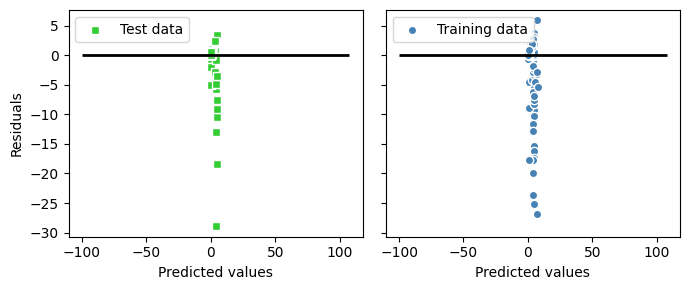

In [20]:
# Graph results

graph_results(predictions["LinearRegression - NoneType - 2016train-2017test"]["y_predict_train"], 
              predictions["LinearRegression - NoneType - 2016train-2017test"]["y_predict"], 
              y_train_2016, 
              y_test_2017)